In [1]:
import scanpy as sc 
import torch
import matplotlib.pyplot as plt
import os
from harmony import harmonize
import scib
os.system("clear")

###############
dataset="human_pancreas_norm_complexBatch"
ncluster=14
###############

data_dir="/home/ubuntu/benchmarking/"+dataset+".h5ad"
adata_raw=sc.read(data_dir)
print(adata_raw)
adata_raw.obs['batch'] = adata_raw.obs.tech
# print_dataset_information(adata_raw,batch_key="BATCH",celltype_key="celltype")

/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/anndata/_io/specs/registry.py:235: OldFormatWarning: Element '/X' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/anndata/_io/specs/registry.py:235: OldFormatWarning: Element '/layers' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/anndata/_io/specs/registry.py:235: OldFormatWarning: Element '/layers/counts' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))


AnnData object with n_obs × n_vars = 16382 × 19093
    obs: 'tech', 'celltype', 'size_factors'
    layers: 'counts'


/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/anndata/_io/utils.py:202: OldFormatWarning: Element '/obs/__categories/tech' was written without encoding metadata.
  return func(*args, **kwargs)
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/anndata/_io/utils.py:202: OldFormatWarning: Element '/obs/tech' was written without encoding metadata.
  return func(*args, **kwargs)
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/anndata/_io/utils.py:202: OldFormatWarning: Element '/obs/__categories/celltype' was written without encoding metadata.
  return func(*args, **kwargs)
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/anndata/_io/utils.py:202: OldFormatWarning: Element '/obs/celltype' was written without encoding metadata.
  return func(*args, **kwargs)
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/anndata/_io/utils.py:202: OldFormatWarning: Element '/obs/size_factors' was written without encoding metadata.
  return func(*args

In [5]:
adata_raw.obs.batch

D101_5          celseq
D101_43         celseq
D101_93         celseq
D102_4          celseq
D172444_23      celseq
                ...   
Sample_1594    smarter
Sample_1595    smarter
Sample_1597    smarter
Sample_1598    smarter
Sample_1600    smarter
Name: batch, Length: 16382, dtype: category
Categories (9, object): ['celseq', 'celseq2', 'fluidigmc1', 'inDrop1', ..., 'inDrop3', 'inDrop4', 'smarter', 'smartseq2']

Harmony is an algorithm for integrating single-cell data from multiple experiments. This function uses the python port of Harmony, harmonypy, to integrate single-cell data stored in an AnnData object. As Harmony works by adjusting the principal components, this function should be run after performing PCA but before computing the neighbor graph, as illustrated in the example below.

## Raw dataset visualization

Note: ovaj dataset je normalizovan!!!

/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/umap/distances.py:

[<Axes: title={'center': 'batch'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'celltype'}, xlabel='UMAP1', ylabel='UMAP2'>]

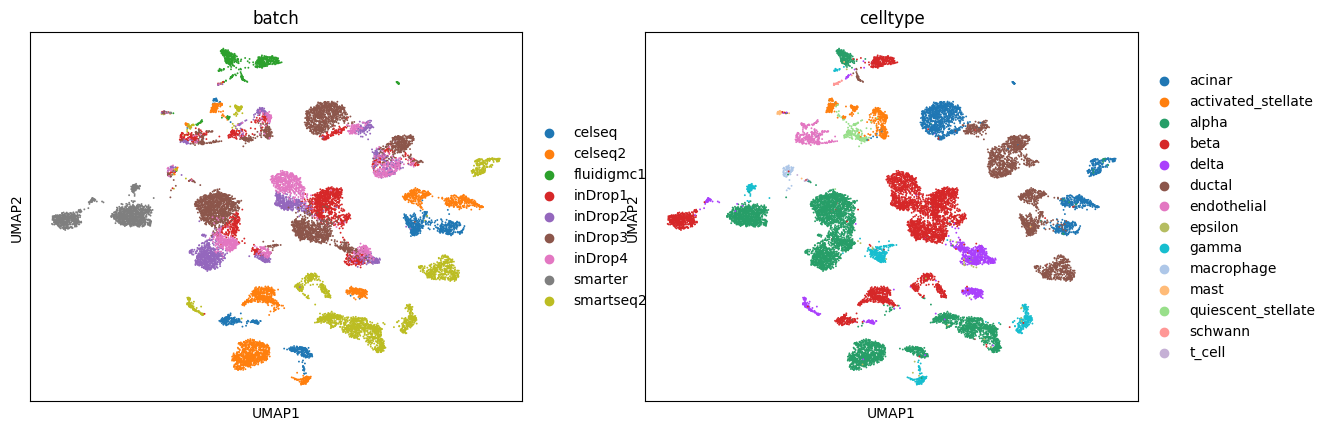

In [3]:
adata_copy=adata_raw.copy()
sc.pp.normalize_total(adata_copy,target_sum=1e4)
sc.pp.log1p(adata_copy)
sc.pp.highly_variable_genes(adata_copy,n_top_genes=2000,subset=True)
sc.pp.scale(adata_copy)
sc.tl.pca(adata_copy)
sc.pp.neighbors(adata_copy)
sc.tl.umap(adata_copy)
sc.pl.umap(adata_copy,color=["batch","celltype"],show=False)

## Harmony integration

In [4]:
sc.tl.pca(adata_raw)
adata_raw.obsm["X_emb"] = harmonize(adata_raw.obsm["X_pca"], adata_raw.obs, batch_key='batch')

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
	Completed 7 / 10 iteration(s).
	Completed 8 / 10 iteration(s).
	Completed 9 / 10 iteration(s).
	Completed 10 / 10 iteration(s).
Reach convergence after 10 iteration(s).


/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'batch'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'celltype'}, xlabel='UMAP1', ylabel='UMAP2'>]

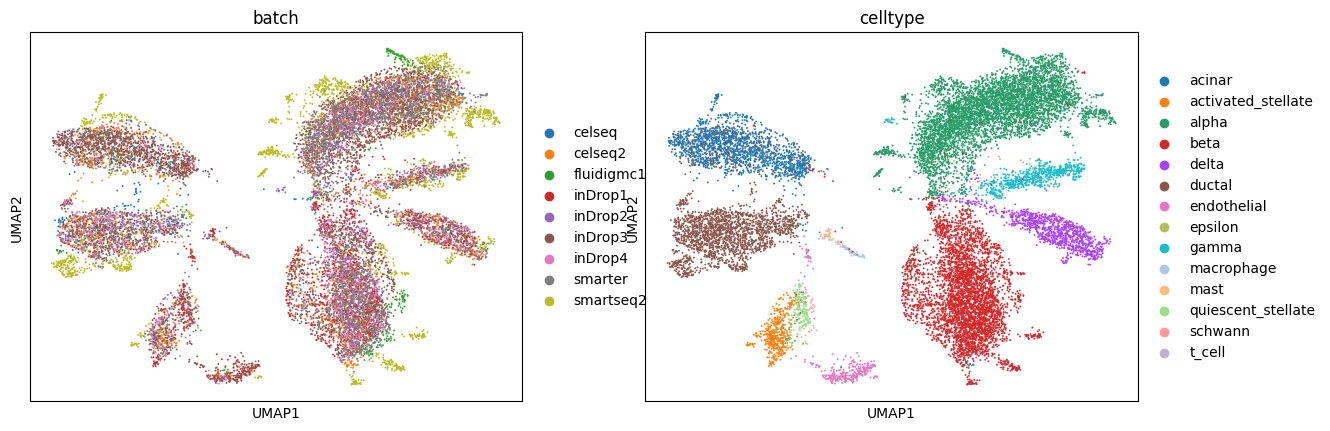

In [5]:
###########################################
sc.pp.neighbors(adata_raw,random_state=0,use_rep="X_emb")
sc.tl.umap(adata_raw)
###########################################

sc.pl.umap(adata_raw,color=["batch", "celltype"],show=False)
#plt.savefig(save_dir+"scDML_embedding1.png")


/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'celltype'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'reassign_cluster'}, xlabel='UMAP1', ylabel='UMAP2'>]

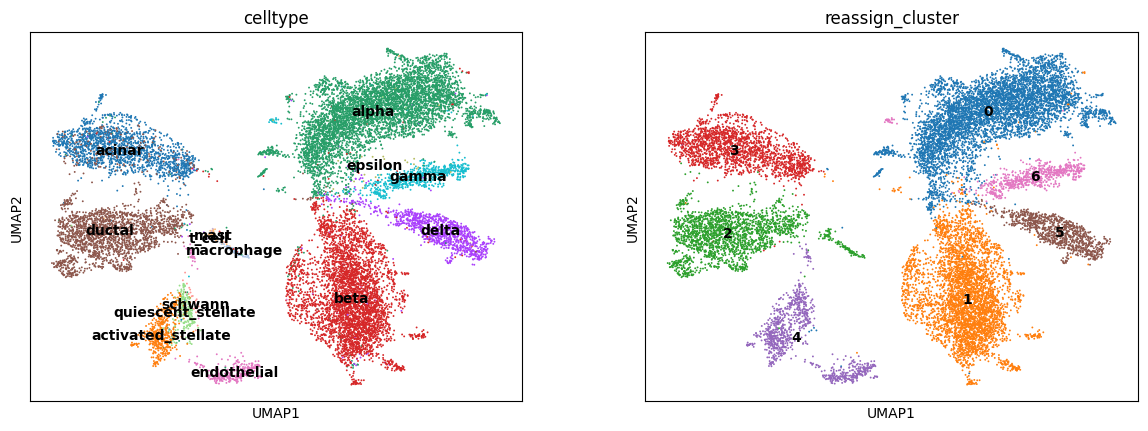

In [6]:
adata_clustering  = adata_raw.copy()
sc.tl.louvain(adata_clustering,resolution=0.09,key_added="leiden")
adata_raw.obs["reassign_cluster"] = adata_clustering.obs.leiden

sc.pl.umap(adata_raw,color=["celltype","reassign_cluster"],legend_loc="on data",show=False)

In [8]:
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
ari=adjusted_rand_score(adata_raw.obs["reassign_cluster"],adata_raw.obs["celltype"])
nmi=normalized_mutual_info_score(adata_raw.obs["reassign_cluster"],adata_raw.obs["celltype"])
print("ARI={}".format(ari))
print("NMI={}".format(nmi))

ARI=0.9084123264606981
NMI=0.8648032402469082


In [10]:
adata_raw

AnnData object with n_obs × n_vars = 16382 × 19093
    obs: 'tech', 'celltype', 'size_factors', 'batch', 'reassign_cluster'
    uns: 'pca', 'neighbors', 'umap', 'batch_colors', 'celltype_colors', 'reassign_cluster_colors'
    obsm: 'X_pca', 'X_emb', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [12]:
scib.me.ilisi_graph(adata_raw, batch_key="batch", type_="embed", use_rep="X_emb")

0.31892274345422367